Question1: Handwriting Recognition using Machine Learning!

Write and submit your python codes in “Jupyter Notebook” to perform the following tasks. Make
sure to provide proper descriptions as MarkDown for each section of your code.

a- Download the dataset “Digit” from CSNS. Check out the dataset. It includes 1797 small
images (8x8 pixels), each one includes a hand-written digit (0-9). You have to download
the corresponding csv file that includes the labels of the images. The goal is to build a
Machine Learning Algorithm that can recognize the hand-written digits!
Import the following two libraries to work with images:


import matplotlib.image as mpimg
import matplotlib.pyplot as plt
you can use:
mpimg.imread(file_name) to load an image, and
plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest') to show an
image.
Add %matplotlib inline at top of your code to make sure that the images will be shown
inside the Jupyter explorer page.

In [40]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

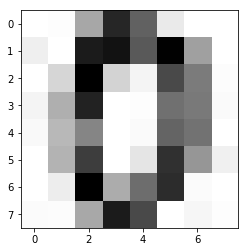

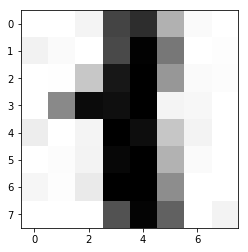

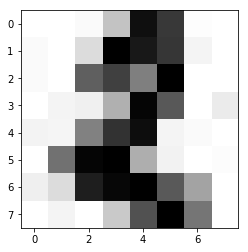

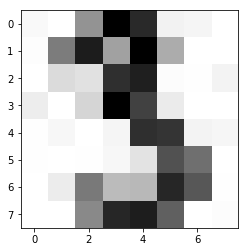

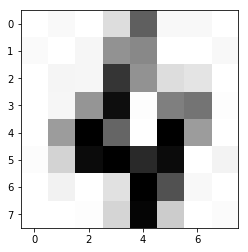

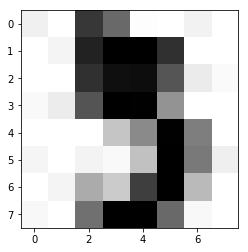

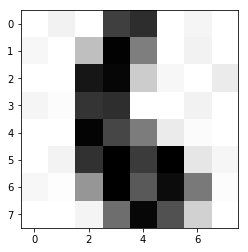

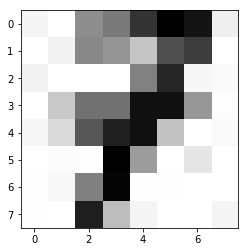

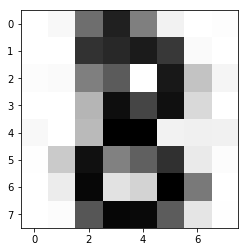

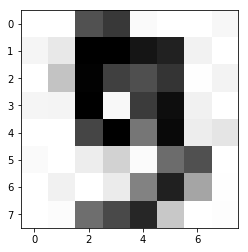

In [41]:
for file in range(0,10):
    img=mpimg.imread(r"C:\RiddhiDocument\MSComputerScience\CS-4661DataSceince\Assignment\HW5\Digit/"+ str(file)+".jpg") #to load an image
    plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest') #to show an image.
    plt.show()


b- Build the feature matrix and label vector: Each image is considered as a data sample with
pixels as features. Thus, to build the feature table you have to convert each 8x8 image
into an array of 64 elements (i.e. 64 pixels), and put it as a row of the feature matrix with
64 feature columns.

In [42]:
N = 1797 # number of images
data = np.zeros((N, 64))

for index in range(N):

    # get the current image and convert to feature,
    img2=mpimg.imread(r"C:\RiddhiDocument\MSComputerScience\CS-4661DataSceince\Assignment\HW5\Digit/"+ str(index)+".jpg")
    feature = img2.reshape(64)
    data[index] = np.copy(feature)

In [43]:
print(data)

[[  0.   2.  88. ...   0.   9.   2.]
 [  0.   0.  11. ... 157.   0.  12.]
 [  0.   0.   5. ... 255. 138.   0.]
 ...
 [  5.   0.  22. ...  87.  21.   0.]
 [  7.   0.  22. ... 196.   0.   7.]
 [  0.  17. 155. ... 198.  26.   0.]]


In [44]:
label=pd.read_csv(r"C:\RiddhiDocument\MSComputerScience\CS-4661DataSceince\Assignment\HW5\label.csv")
label=label["digitLabel"]
label.head()

0    0
1    1
2    2
3    3
4    4
Name: digitLabel, dtype: int64

In [45]:
feature_mat=pd.DataFrame(data) 

print(feature_mat.head())

    0    1      2      3      4      5     6    7     8      9   ...      54  \
0  0.0  2.0   88.0  217.0  158.0   21.0   0.0  0.0  16.0    0.0  ...     4.0   
1  0.0  0.0   11.0  187.0  210.0   78.0   5.0  0.0  13.0    5.0  ...     0.0   
2  0.0  0.0    5.0   59.0  240.0  199.0   2.0  0.0   5.0    0.0  ...    92.0   
3  6.0  0.0  108.0  255.0  213.0   13.0  10.0  0.0   2.0  131.0  ...   168.0   
4  0.0  6.0    0.0   34.0  160.0    7.0   7.0  0.0   5.0    0.0  ...     7.0   

    55   56    57     58     59     60     61     62    63  
0  0.0  4.0   3.0   87.0  228.0  182.0    0.0    9.0   2.0  
1  0.0  0.0   0.0    0.0  172.0  251.0  157.0    0.0  12.0  
2  0.0  0.0  11.0    0.0   54.0  173.0  255.0  138.0   0.0  
3  1.0  0.0   0.0  118.0  217.0  226.0  159.0    0.0   3.0  
4  0.0  0.0   0.0    2.0   42.0  250.0   51.0    0.0   4.0  

[5 rows x 64 columns]


c- Use sklearn functions to split the dataset into testing and training sets with the following
parameters: test_size=0.1, random_state=2.

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(feature_mat,label,test_size=0.1,random_state=2)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1617, 64)
(180, 64)
(1617,)
(180,)


d- Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on
the training/testing datasets that you built in part (c). Use this command to import and
define your classifier:

from sklearn.ensemble import RandomForestClassifier
my_RandomForest =
RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

Use my_RandomForest.fit for training your random forest classifier and
my_RandomForest.predict for prediction. Test your Machine Learning Algorithm on
testing set (from part(c)), and calculate and report the accuracy.

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
my_RandomForest =RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)


In [50]:
my_RandomForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [51]:
y_predict_rf= my_RandomForest.predict(X_test)

print(y_predict_rf)


[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 7 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 5 4 9 6 1 7 0 1 9 7 3 3 1 1 8 8 9 8 5 7 4 7 2 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 1 0 3 4 3 0 7 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 5 7 4 8 9 5 7 6 9 4 0 4 0 0 4]


In [52]:
from sklearn.metrics import accuracy_score

accuracy_rf =accuracy_score(y_test,y_predict_rf)

print("RandomForest :",accuracy_rf)



RandomForest : 0.9277777777777778


In [53]:
y_test.size

180

In [54]:
print("Y-test : ",y_test)
print("Y-Predict : ",y_predict_rf)

Y-test :  154     4
564     0
1444    9
1394    1
1660    4
1368    7
1436    1
1420    5
1334    1
581     6
1449    6
240     7
232     6
916     1
1292    5
1144    5
1611    4
1369    6
1104    2
707     7
1281    4
1173    6
1525    4
558     1
1189    5
538     2
944     9
671     5
1777    4
1352    6
       ..
1631    1
452     6
239     4
643     8
501     2
85      1
76      8
1708    4
736     1
477     3
1613    1
1505    1
1188    9
391     5
1536    4
1468    8
7       7
1091    4
462     8
287     9
1333    5
624     7
960     6
459     9
1573    0
458     0
68      4
825     0
1153    0
1095    4
Name: digitLabel, Length: 180, dtype: int64
Y-Predict :  [4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 7 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 5 4 9 6 1 7 0 1 9 7 3 3 1 1 8 8 9 8 5 7 4 7 2 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 1 0 3 4 3 0 7 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 

e- Write some codes to find which one of the data samples (i.e. which images) have been
misclassified (classified incorrectly) in your testing set. Then, use the following command
to show the misclassified images:
plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest'

In [55]:
y_test = np.asarray(y_test)
misclas = np.where(y_test != y_predict_rf)
misclas[0]


array([  4,  16,  41,  44,  45,  49,  63,  66, 115, 130, 137, 165, 174],
      dtype=int64)

8


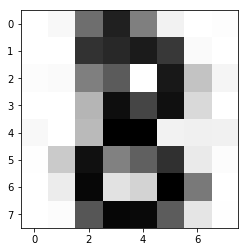

7


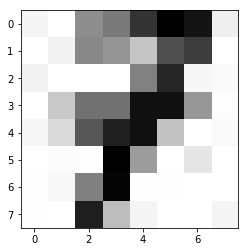

1


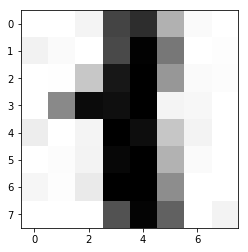

5


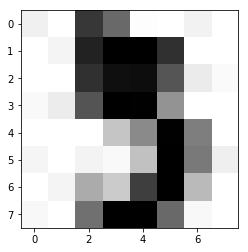

4


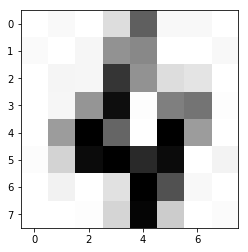

7


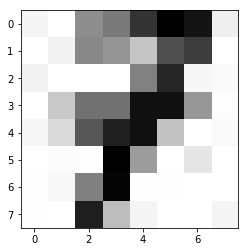

7


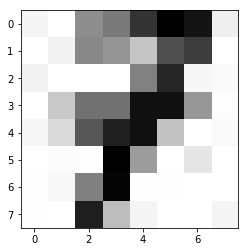

2


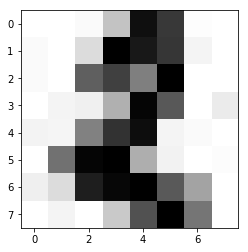

1


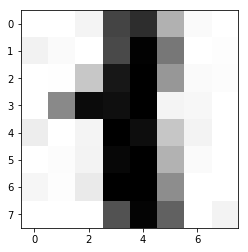

5


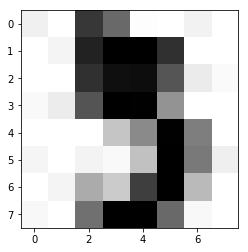

7


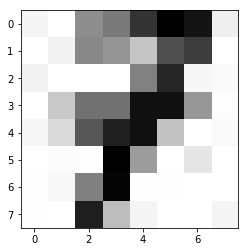

5


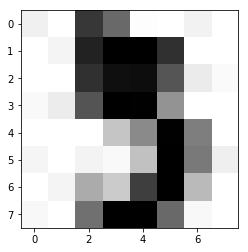

4


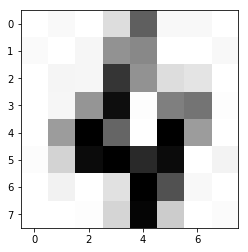

In [56]:
for index in misclassified[0]:

    # get the current image and convert to feature, as above
    print(y_predict_rf[index])
    img2=mpimg.imread(r"C:\RiddhiDocument\MSComputerScience\CS-4661DataSceince\Assignment\HW5\Digit/"+ str(y_predict_rf[index])+".jpg")
    plt.imshow(img2,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()